# swarmplot


При рассмотрении примеров работы библиотеки seaborn, нам также понадобятся библиотеки matplotlib, pandas и numpy.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
%config InlineBackend.figure_format = 'svg'

Данный код позволяет отображать графики в формате SVG (Scalable Vector Graphics), то есть в формате векторной графики. SVG основан на векторах, и это означает, что изображения состоят из линий и форм, а не пикселей. Это позволяет масштабировать изображения без потери качества.

*Swarmplot* - это вид диаграммы рассеяния в библиотеке *seaborn*, который используется для визуализации распределения данных, обеспечивая, чтобы точки не накладывались друг на друга. Это достигается путем распределения точек на определенные позиции на оси, чтобы каждая точка была видна.

За построение диаграмм *swarmplot* в библиотеке *seaborn* отвечает функция `sns.swarmplot()`, работу которой мы разберём на примере датесета `'tips'`.

Загрузим датасет:

In [3]:
tips = sns.load_dataset('tips')

tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


Датафрейм содержит следующую информацию:
- `total_bill`: общая сумма счета;
- `tip`: сумма чаевых;
- `sex`: пол посетителя;
- `smoker`: курящий или нет;
- `day`: день недели;
- `time`: время посещения ресторана (обед или ужин);
- `size`: количество людей за столиком.

Построим график распределения общей суммы счёта:

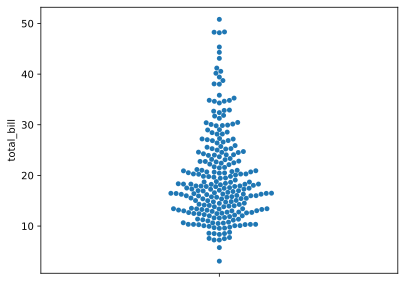

In [5]:
sns.swarmplot(tips['total_bill']);

Построим диаграмму с горизонтальным отображением:

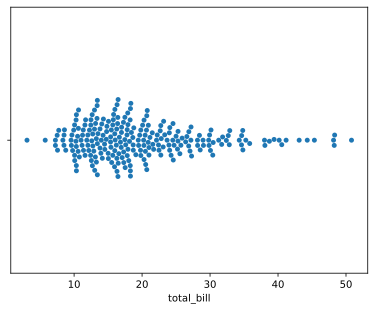

In [6]:
sns.swarmplot(data=tips, x='total_bill');

Задействуем вторую ось, на которой отложим категориальные данные, например, день недели:

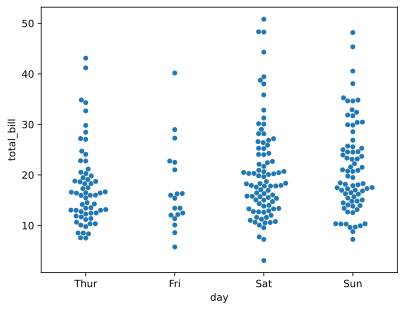

In [7]:
sns.swarmplot(data=tips, x='day', y='total_bill');

Раскрасим категории в разные цвета:

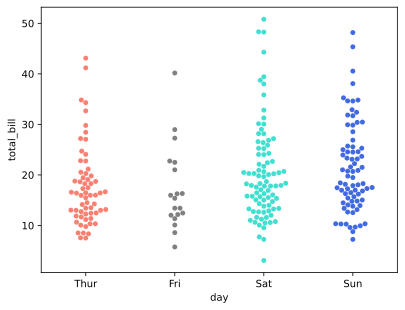

In [8]:
my_palette = ['Salmon', 'grey', 'Turquoise', 'royalblue']

sns.swarmplot(data=tips, x='day', y='total_bill',
              hue='day',
              palette=my_palette);

Видим, как распределены стоимости обедов в ресторане в зависимости от дня недели.

Так как на этом графике есть подписи категориальных данных, то *seaborn* не дублирует информацию и не отображает легенду. Если потребуется её показать, то параметру `legend` надо передать значение `True`, и легенда появится на графике:

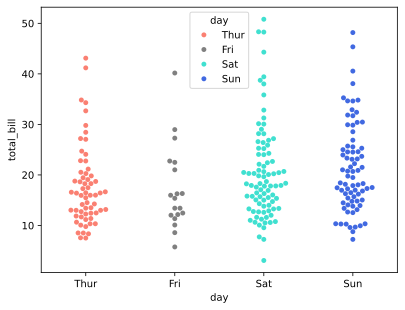

In [9]:
sns.swarmplot(data=tips, x='day', y='total_bill',
              hue='day',
              palette=my_palette,
              legend=True);

График `swarmplot` хорош тем, что он позволяет наглядно увидеть плотность и распределение данных без наложения точек, что делает его полезным для анализа и представления данных. Например, если бы мы построили диаграмму `scatterplot`, то предыдущий график выглядел бы следующим образом:

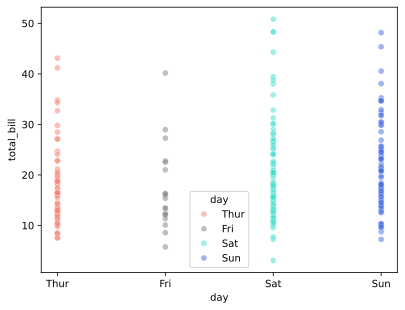

In [10]:
sns.scatterplot(data=tips, x='day', y='total_bill',
              hue='day',
              palette=my_palette,
              alpha=0.5);

В этом случае, даже применение параметра `alpha` не даёт нам полного понимания о плотности данных, в отличие от диаграммы *swarmplot*.

Параметром `hue` можем разбить категориальные данные на подкатегории. Например, посмотрим на распределение чаевых в зависимости от дня недели и пола посетителя:

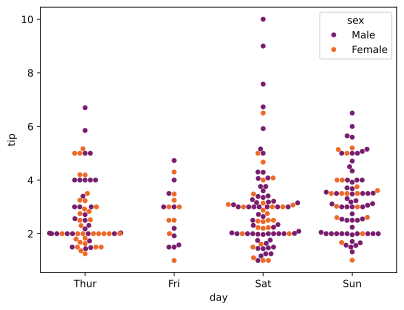

In [12]:
sns.swarmplot(data=tips, x='day', y='tip',
              hue='sex',
              palette='inferno');

Параметром `dodge=True` возможно отделить группы подкатегорий друг от друга:

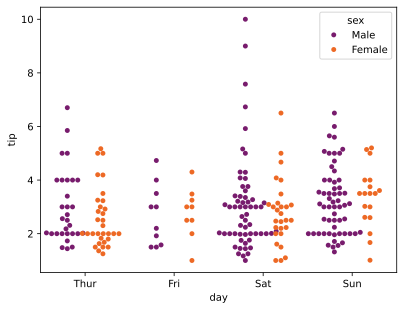

In [14]:
sns.swarmplot(data=tips, x='day', y='tip',
              hue='sex',
              palette='inferno',
              dodge=True);

При большом объёме данных возможны ситуации, когда не все точки могут поместиться на графике. В этом случае *seaborn* сделает предупреджение, что какой-то определённый процент данных не поместился на графике и предложит уменьшить размер точек. Например:

C:\Users\ardat\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 6.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


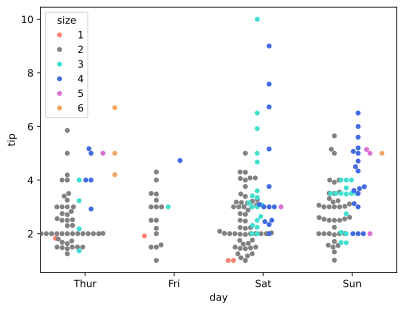

In [15]:
my_palette = ['Salmon', 'grey', 'Turquoise', 'royalblue', 'Orchid', 'SandyBrown']

sns.swarmplot(data=tips, x='day', y='tip',
              hue='size',
              palette=my_palette,
              dodge=True);

В данном примере не все точки отобразились на диаграмме. За управление размером точек отвечает параметр `size`, который по умолчанию принимает значение `5`.

Уменьшим размер точек на предыдущем графике:

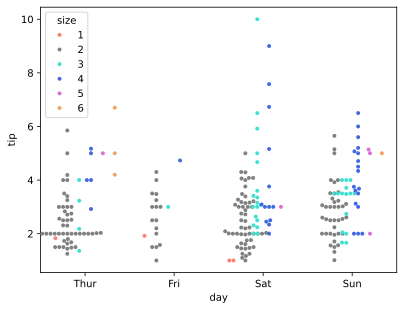

In [16]:
sns.swarmplot(data=tips, x='day', y='tip',
              hue='size',
              palette=my_palette,
              dodge=True,
              size=4);

**Комбинация с boxplot**

Совместное использование **boxplot** и **swarmplot** позволяет визуализировать распределение данных двумя различными способами одновременно. Такая комбинация даёт более полное представление о данных, объединяя сводные статистические характеристики и детальное распределение значений.

Посмотрим на это сочетание на примере:

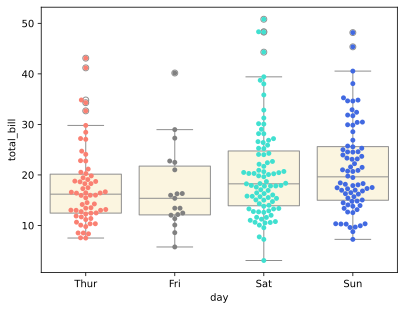

In [17]:
my_palette = ['Salmon', 'grey', 'Turquoise', 'royalblue']

sns.boxplot(data=tips, x='day', y='total_bill',
            color='Cornsilk');

sns.swarmplot(data=tips, x='day', y='total_bill',
              hue='day',
              palette=my_palette);

Когда точек много, то не лишним будет делать их полупрозрачными, чтобы диаграмма размаха была хорошо видна. Например:

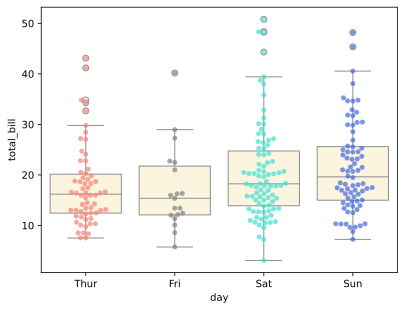

In [18]:
sns.boxplot(data=tips, x='day', y='total_bill',
            color='Cornsilk');

sns.swarmplot(data=tips, x='day', y='total_bill',
              hue='day',
              palette=my_palette,
              alpha=0.7);

Комбинация двух графиков делает визуализацию более информативной и привлекательной для анализа и представления данных.

**Комбинация с violinplot**

Также возможно совместное использование **swarmplot** со скрипичной диаграммой. Например:

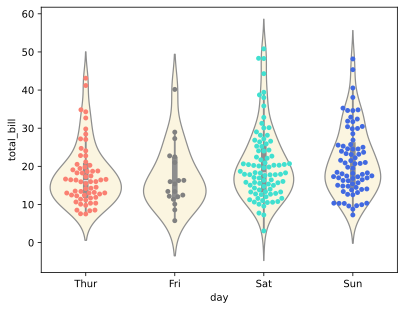

In [19]:
sns.violinplot(data=tips, x='day', y='total_bill',
            color='Cornsilk');

sns.swarmplot(data=tips, x='day', y='total_bill',
              hue='day',
              palette=my_palette);

Здесь тоже не лишней будет полупрозрачность точек:

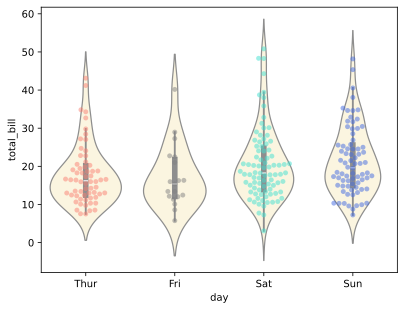

In [20]:
sns.violinplot(data=tips, x='day', y='total_bill',
            color='Cornsilk');

sns.swarmplot(data=tips, x='day', y='total_bill',
              hue='day',
              palette=my_palette,
              alpha=0.5);

Или, например, вариация без диаграммы размаха и с нормализацией "виолончелей" по количеству наблюдений:

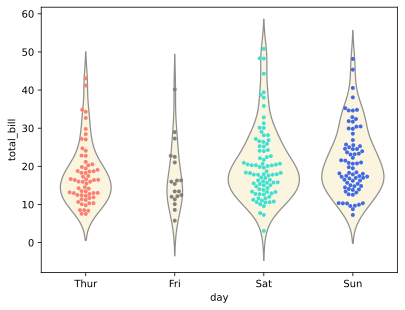

In [21]:
sns.violinplot(data=tips, x='day', y='total_bill',
               color='Cornsilk',
               density_norm='count',
               inner=None);

sns.swarmplot(data=tips, x='day', y='total_bill',
              hue='day',
              palette=my_palette,
              size=4);

Параметром `linewidth` задаётся ширина внешней границы маркера:

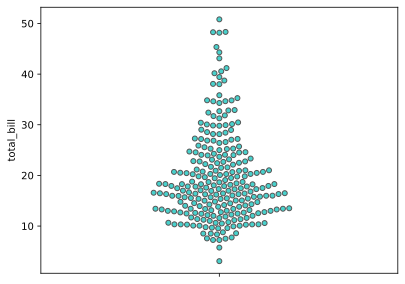

In [22]:
sns.swarmplot(data=tips, y='total_bill', 
              color='MediumTurquoise',
              linewidth=1);

Параметр `edgecolor` управляет цветом внешней границы маркера:

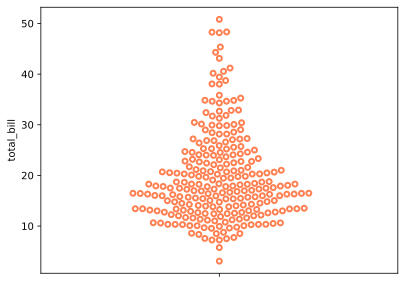

In [23]:
sns.swarmplot(data=tips, y='total_bill', 
              linewidth=2,
              color='white',
              edgecolor='coral');

Параметр `marker` используется для определения стиля маркера, который будет отображаться на графике для каждой точки данных:

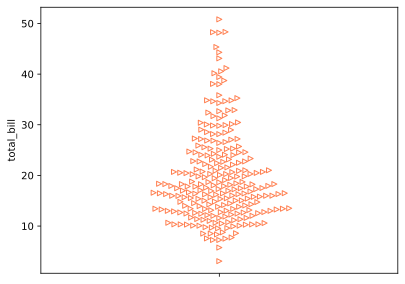

In [24]:
sns.swarmplot(data=tips, y='total_bill', 
              linewidth=1,
              color='white',
              edgecolor='coral',
              marker='>');